<a href="https://colab.research.google.com/github/jeddyclass/202211.NCUT/blob/main/6_%E9%9D%9E%E7%9B%A3%E7%9D%A3%E5%BC%8F%E5%AD%B8%E7%BF%92k_means%E5%88%86%E7%BE%A4_ipynb_txt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#source: https://github.com/andy6804tw/2021-13th-ironman

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

## 1) 載入資料集

In [2]:
iris = load_iris()
df_data = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm','Species'])
df_data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [3]:
X = df_data.drop(labels=['Species'],axis=1).values # 移除Species並取得剩下欄位資料
y = df_data['Species']

## K-Means
Parameters:
- n_cluster: K的大小，也就是分群的類別數量。
- random_state: 亂數種子，設定常數能夠保證每次分群結果都一樣。
- n_init: 預設為10次隨機初始化，選擇效果最好的一種來作為模型。
- max_iter: 迭代次數，預設為300代。
    
Attributes:
- inertia_: inertia_：float，每個點到其他叢集的質心的距離之和。
- cluster_centers_： 特徵的中心點 `[n_clusters, n_features]`。
    
Methods:
- fit: K個集群分類模型訓練。
- predict: 預測並回傳類別。
- fit_predict: 先呼叫fit()做集群分類，之後在呼叫predict()預測最終類別並回傳輸出。
- transform: 回傳的陣列每一行是每一個樣本到kmeans中各個中心點的L2(歐幾里得)距離。
- fit_transform: 先呼叫fit()再執行transform()。

### K-Means 的演算過程:
1. 初始化：指定K個分群，並隨機挑選K個資料點的值當作群組中心值
2. 分配資料點：將每個資料點設為距離最近的中心
3. 計算平均值：重新計算每個分群的中心點

> 重複步驟2、3，直到資料點不再變換群組為止

In [4]:
from sklearn.cluster import KMeans

kmeansModel = KMeans(n_clusters=3, random_state=46)
clusters_pred = kmeansModel.fit_predict(X)

## 評估分群結果
inertia: within cluster sum of squres, 各sample到各該群的centroid的距離之平方和，用來評估cluster的成效，越大代表越差

In [5]:
kmeansModel.inertia_

78.851441426146

查看各cluster的中心，並在圖上畫出

In [6]:
kmeansModel.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

## 真實分類

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


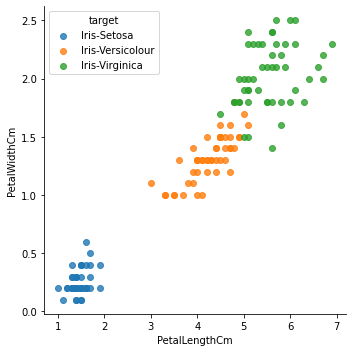

In [7]:
sns.lmplot("PetalLengthCm", "PetalWidthCm", hue='Species', data=df_data, fit_reg=False, legend=False)
plt.legend(title='target', loc='upper left', labels=['Iris-Setosa', 'Iris-Versicolour', 'Iris-Virginica'])
plt.show()

## K-mean 後預測結果

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


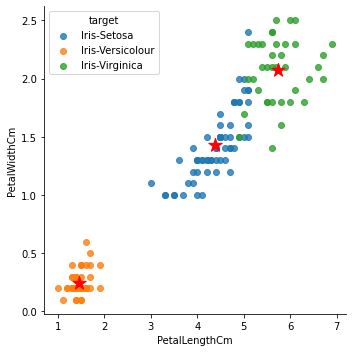

In [8]:
df_data['Predict']=clusters_pred
sns.lmplot("PetalLengthCm", "PetalWidthCm", data=df_data, hue="Predict", fit_reg=False, legend=False)
plt.scatter(kmeansModel.cluster_centers_[:, 2], kmeansModel.cluster_centers_[:, 3], s=200,c="r",marker='*')
plt.legend(title='target', loc='upper left', labels=['Iris-Setosa', 'Iris-Versicolour', 'Iris-Virginica'])
plt.show()

## 使用inertia做評估

In [9]:
# k = 1~9 做9次kmeans, 並將每次結果的inertia收集在一個list裡
kmeans_list = [KMeans(n_clusters=k, random_state=46).fit(X)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_list]

如圖，當K值越來越大，inertia會隨之越來越小，(但k=n時理論上inertia會減為0, 因此實際上不能選inertia最小的那個k) 一般是取elbow point, 即inertia迅速下降轉為平緩的那個點

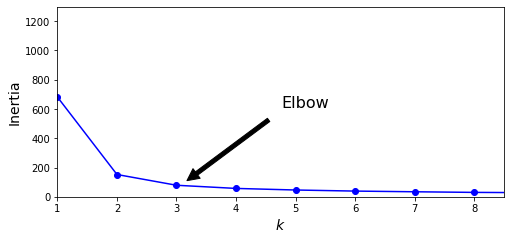

In [10]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow',
             xy=(3, inertias[3]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.axis([1, 8.5, 0, 1300])

plt.show()

另外一個方法是用silhouette scores 去評估. 
The Silhouette Coefficient is calculated using the mean intra-cluster distance (a) and the mean nearest-cluster distance (b) for each sample. The Silhouette Coefficient for a sample is (b - a) / max(a, b). (https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html#sklearn.metrics.silhouette_score)
Silhouette Coefficient 越大代表分群效果越好

In [11]:
from sklearn.metrics import silhouette_score
silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_list[1:]]

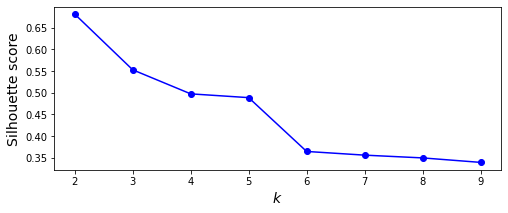

In [12]:
plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)

plt.show()